In [1]:
#web scrape
import requests
from bs4 import BeautifulSoup
import os
archive_url = "https://clarksonmsda.org/ml/audio2/data/numbers/5/"

def get_audio_links():

	r = requests.get(archive_url)
	soup = BeautifulSoup(r.content,'html.parser')
	links = soup.findAll('a')
	video_links = [archive_url + link['href'] for link in links if link['href'].endswith('wav')]
	return video_links


def download_audio_series(video_links,directory):
	if not os.path.exist(directory):
		os.makedirs(directory)

	for link in video_links:
		file_name = os.path.join(directory,link.split('/')[-1])

		print( "Downloading file:%s"%file_name)
		r = requests.get(link, stream = True)
		with open(file_name, 'wb') as f:
			for chunk in r.iter_content(chunk_size = 1024*1024):
				if chunk:
					f.write(chunk)
		
		print( "%s downloaded!\n"%file_name )

	print ("All Audio downloaded!")
	return


audio_links = get_audio_links()
directory = "/audio/1"
download_audio_series(audio_links)
	

	

  

american_f_Alexa_20230406110150.wav downloaded!

american_m_Josh_20230405130012.wav downloaded!

american_m_Josh_20230405130013.wav downloaded!

american_m_Selorm_20230408180030.wav downloaded!

american_m_Shaun_20230406131836.wav downloaded!

american_m_Shaun_20230406131837.wav downloaded!

americans_m_MaximusPowers_20230404125947.wav downloaded!

brazilian_m_Maeva_20230406094754.wav downloaded!

indian_f_Bhavana_20230406090952.wav downloaded!

indian_f_Tejaswini_20230406085222.wav downloaded!

indian_m_AntarikshLodhi_20230410114208.wav downloaded!

indian_m_AntarikshLodhi_20230410114212.wav downloaded!

indian_m_AntarikshLodhi_20230410114219.wav downloaded!

sri-lankan_f_Chethani_20230410101807.wav downloaded!

sri-lankan_f_Dinushani_20230405112026.wav downloaded!

sri-lankan_f_Prathi_20230406133121.wav downloaded!

sri-lankan_f_Thevasha_20230405112448.wav downloaded!

sri-lankan_m_Roshan_20230406205732.wav downloaded!

sri-lankan_m_Roshan_20230406205733.wav downloaded!

sri-lankan_m

In [95]:
import IPython.display as ipd
ipd.Audio('audio/0/indian_f_Tejaswini_20230406085222.wav')

In [87]:
import os
path = "/Users/ksr/Machine Learning/Final Project Audio/audio/0"
dir_list = os.listdir(path)
for name in dir_list:
    print(name)

sri-lankan_f_Thevasha_20230405112448.wav
indian_f_Tejaswini_20230406085222.wav
american_m_Evan_20230406131112.wav
american_m_Josh_20230405130013.wav
american_f_Alexa_20230406110150.wav
nigerian_m_Amara_20230411132946.wav
pakistani_m_Vijay_20230411132703.wav
sri-lankan_f_Prathi_20230406133121.wav
indian_m_AntarikshLodhi_20230410114208.wav
indian_f_Bhavana_20230406090952.wav
ghanaian_m_Wisdom_20230411133750.wav
american_f_Maria_20230405140612.wav
american_m_Selorm_20230408180030.wav
nigerian_m_Ola_20230411135205.wav
ghanaian_m_Emma_20230411134116.wav
indian_m_AntarikshLodhi_20230410114211.wav
ghanaian_m_Wilson_20230411133436.wav
venezuelan_f_Glories_20230406111759.wav
american_f_Alexa_20230406110149.wav
brazilian_m_Maeva_20230406094754.wav
chinese_m_Sam_20230411131718.wav
american_m_Shaun_20230406131836.wav


32000

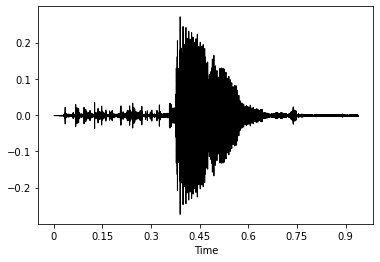

In [3]:
import librosa as librosa
import numpy as np
from matplotlib import pyplot as plt
import os
path = "/Users/ksr/Machine Learning/Final Project Audio/audio/4"
y,sr=librosa.load('audio/3/american_f_Maria_20230405140612.wav',sr=32000)
librosa.display.waveshow(y,sr=sr,color='black')
sr


In [88]:
dir_list

['sri-lankan_f_Thevasha_20230405112448.wav',
 'indian_f_Tejaswini_20230406085222.wav',
 'american_m_Evan_20230406131112.wav',
 'american_m_Josh_20230405130013.wav',
 'american_f_Alexa_20230406110150.wav',
 'nigerian_m_Amara_20230411132946.wav',
 'pakistani_m_Vijay_20230411132703.wav',
 'sri-lankan_f_Prathi_20230406133121.wav',
 'indian_m_AntarikshLodhi_20230410114208.wav',
 'indian_f_Bhavana_20230406090952.wav',
 'ghanaian_m_Wisdom_20230411133750.wav',
 'american_f_Maria_20230405140612.wav',
 'american_m_Selorm_20230408180030.wav',
 'nigerian_m_Ola_20230411135205.wav',
 'ghanaian_m_Emma_20230411134116.wav',
 'indian_m_AntarikshLodhi_20230410114211.wav',
 'ghanaian_m_Wilson_20230411133436.wav',
 'venezuelan_f_Glories_20230406111759.wav',
 'american_f_Alexa_20230406110149.wav',
 'brazilian_m_Maeva_20230406094754.wav',
 'chinese_m_Sam_20230411131718.wav',
 'american_m_Shaun_20230406131836.wav']

sri-lankan_f_Thevasha_20230405112448.wav
indian_f_Tejaswini_20230406085222.wav
american_m_Evan_20230406131112.wav
american_m_Josh_20230405130013.wav
american_f_Alexa_20230406110150.wav
nigerian_m_Amara_20230411132946.wav
pakistani_m_Vijay_20230411132703.wav
sri-lankan_f_Prathi_20230406133121.wav
indian_m_AntarikshLodhi_20230410114208.wav
indian_f_Bhavana_20230406090952.wav
ghanaian_m_Wisdom_20230411133750.wav
american_f_Maria_20230405140612.wav
american_m_Selorm_20230408180030.wav
nigerian_m_Ola_20230411135205.wav
ghanaian_m_Emma_20230411134116.wav
indian_m_AntarikshLodhi_20230410114211.wav
ghanaian_m_Wilson_20230411133436.wav
venezuelan_f_Glories_20230406111759.wav
american_f_Alexa_20230406110149.wav
brazilian_m_Maeva_20230406094754.wav
chinese_m_Sam_20230411131718.wav
american_m_Shaun_20230406131836.wav


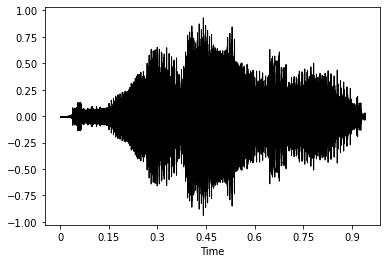

In [2]:
import librosa as librosa
import numpy as np
from matplotlib import pyplot as plt
import os
path = "/Users/ksr/Machine Learning/Final Project Audio/audio/0"
dir_list = os.listdir(path)
for name in dir_list:
    print(name)
    actual='audio/0/'+name
    y, sr = librosa.load(actual)
    spectrogram = librosa.stft(y)
    librosa.display.waveshow(y,sr=sr,color='black')
    



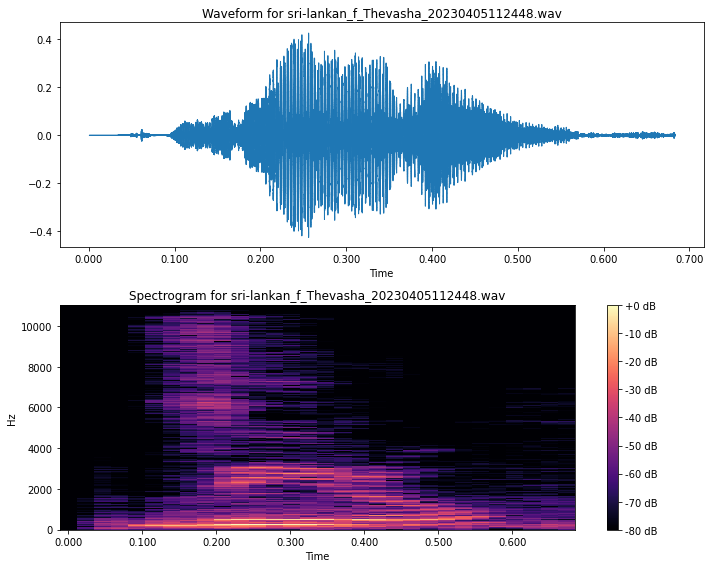

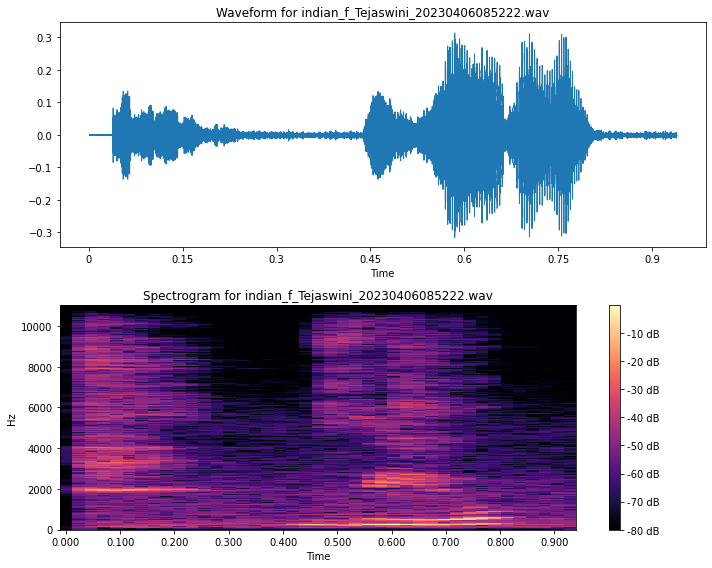

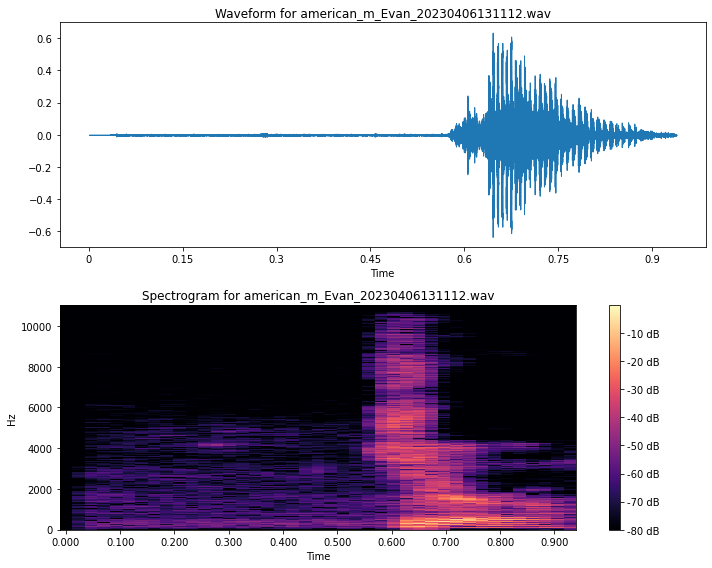

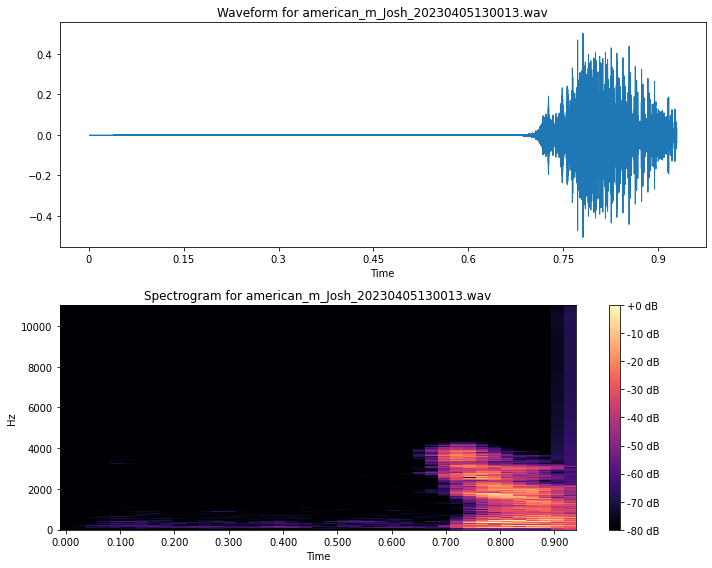

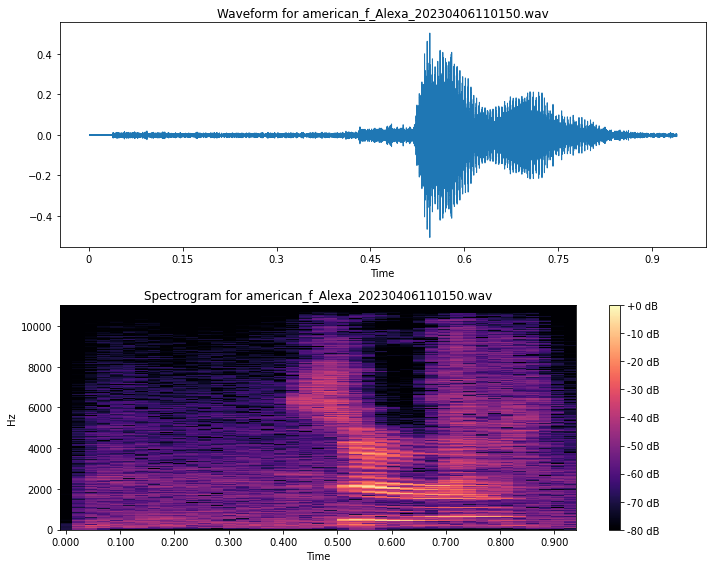

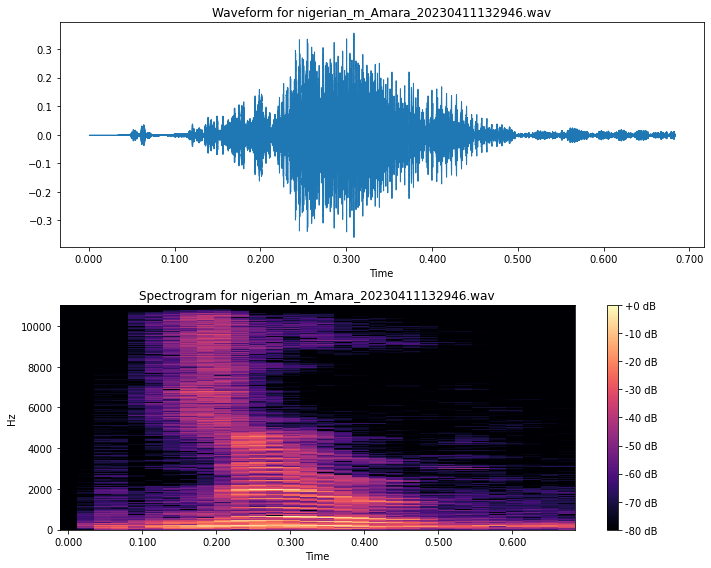

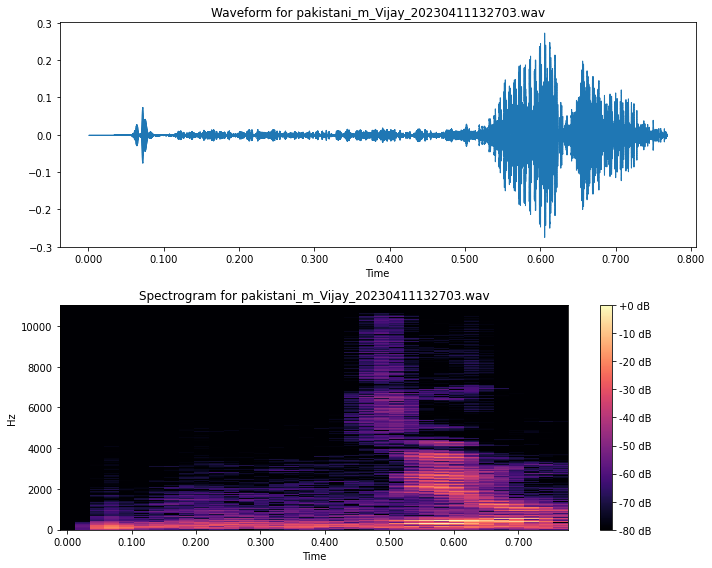

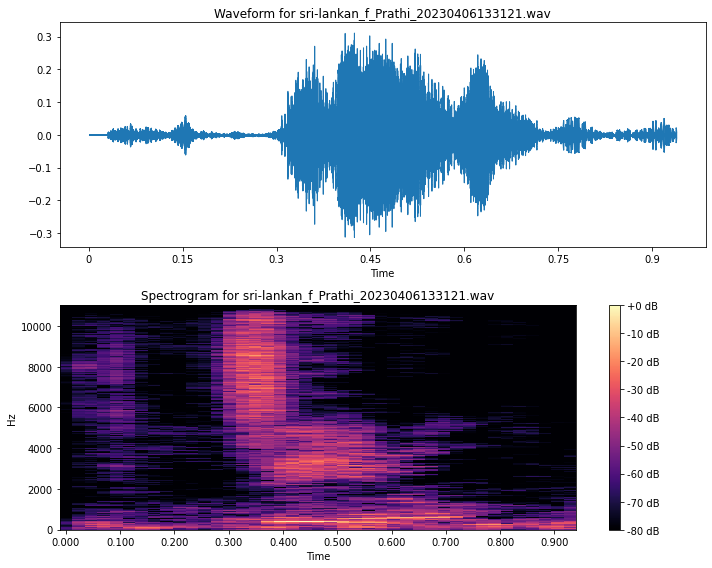

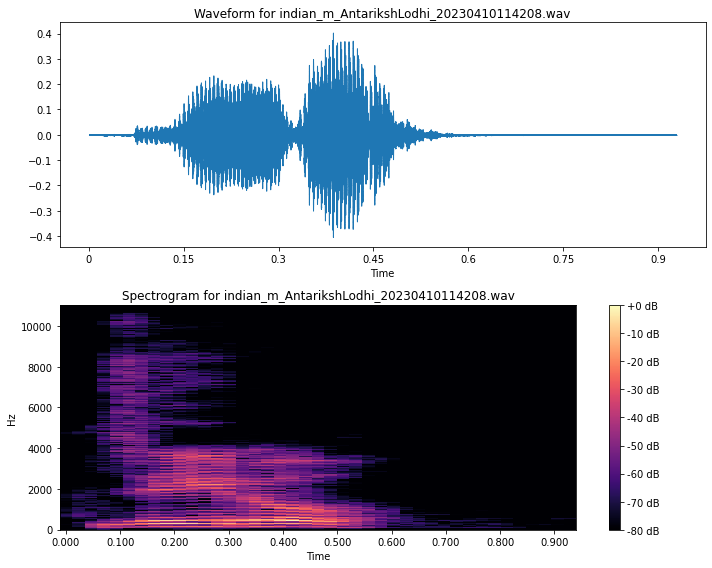

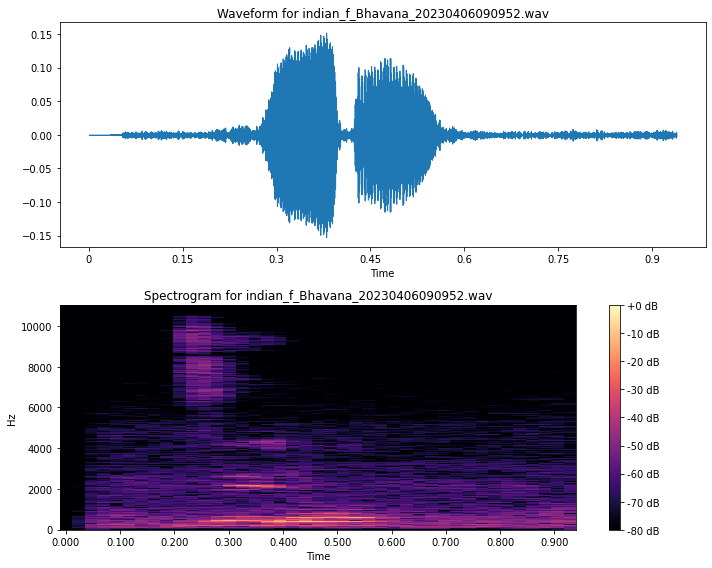

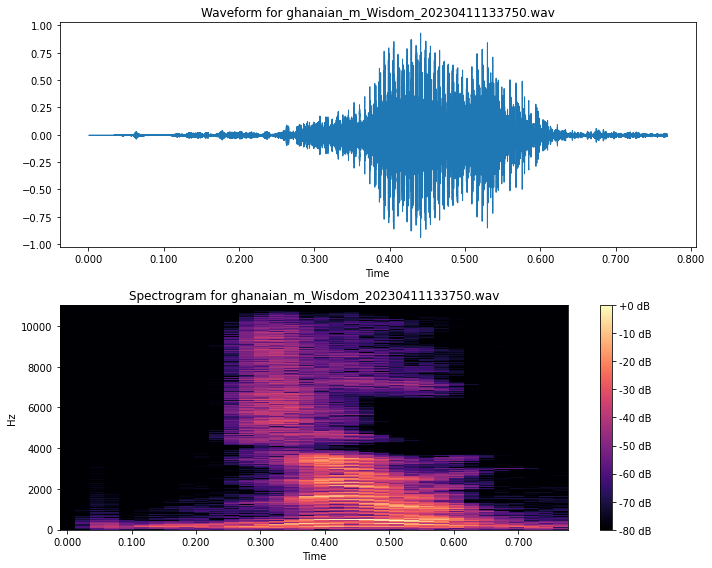

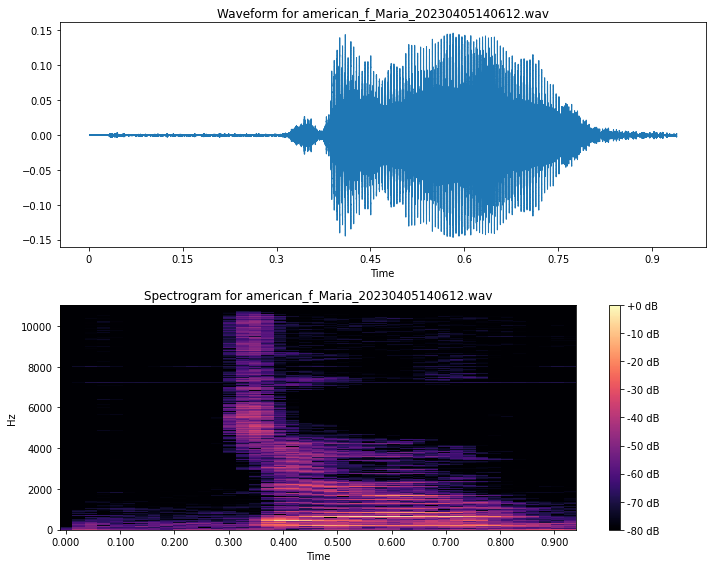

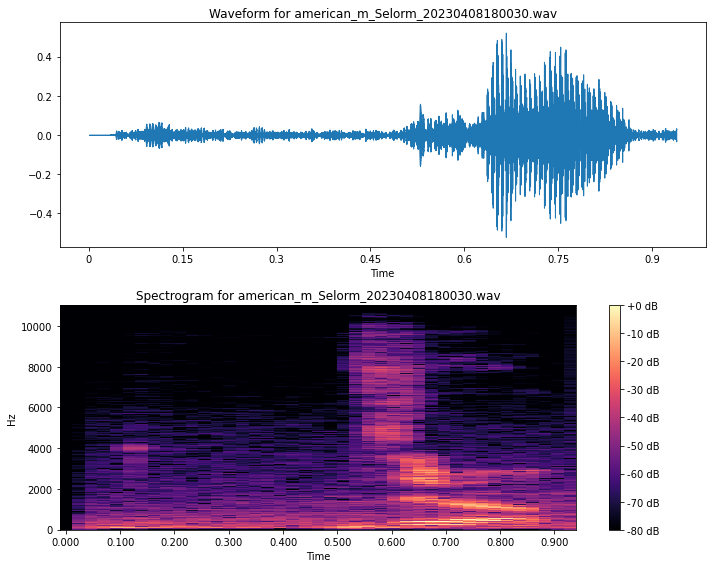

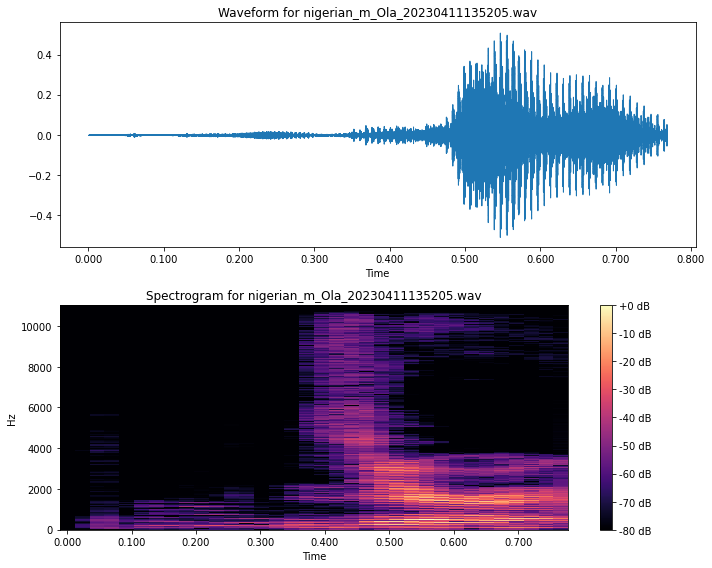

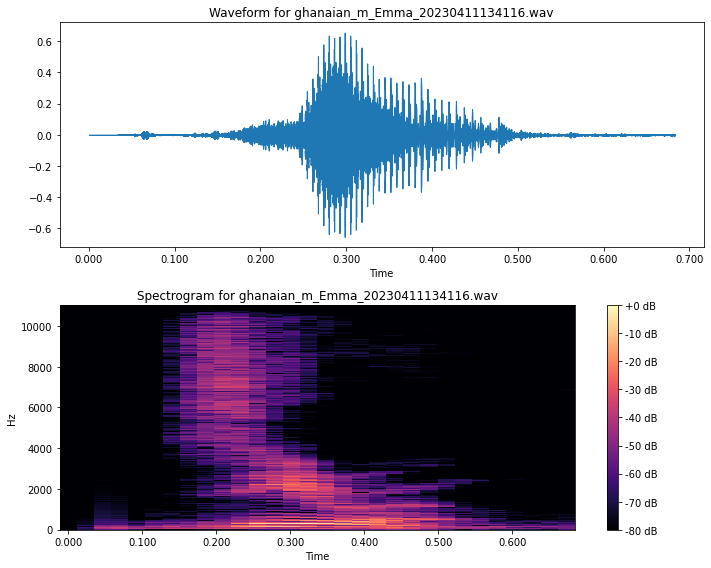

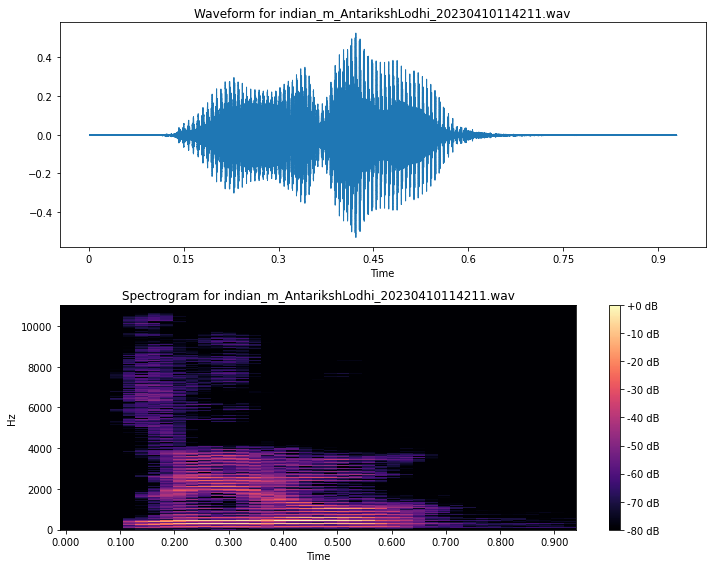

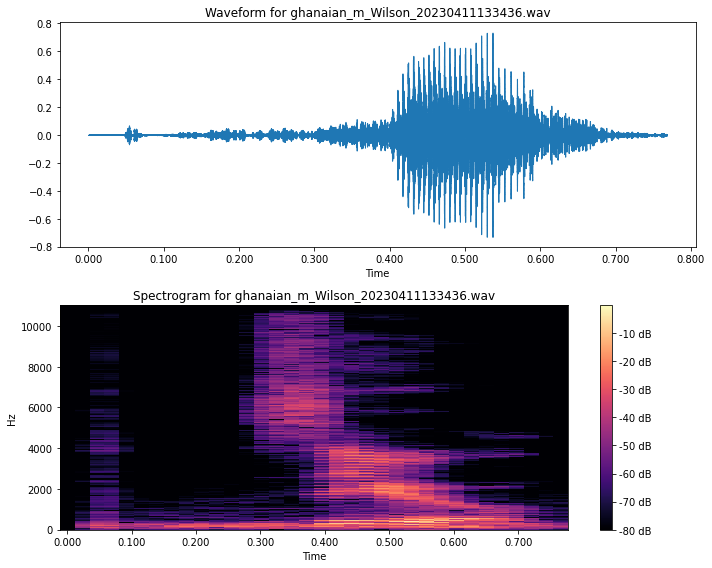

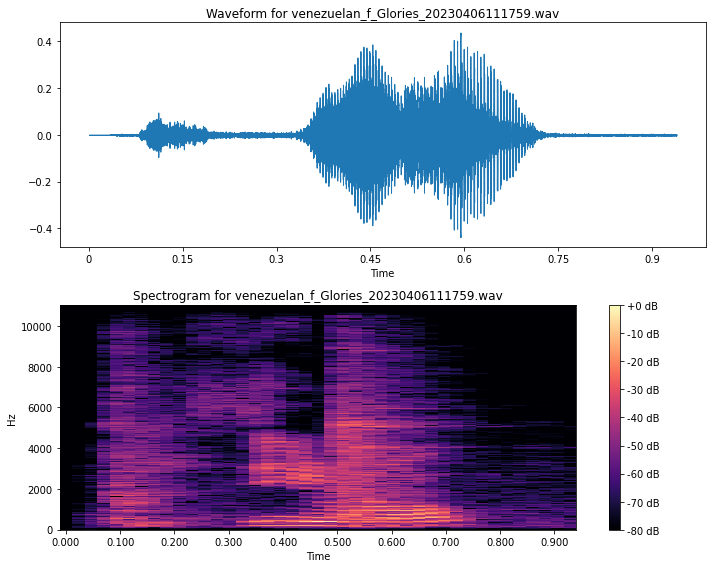

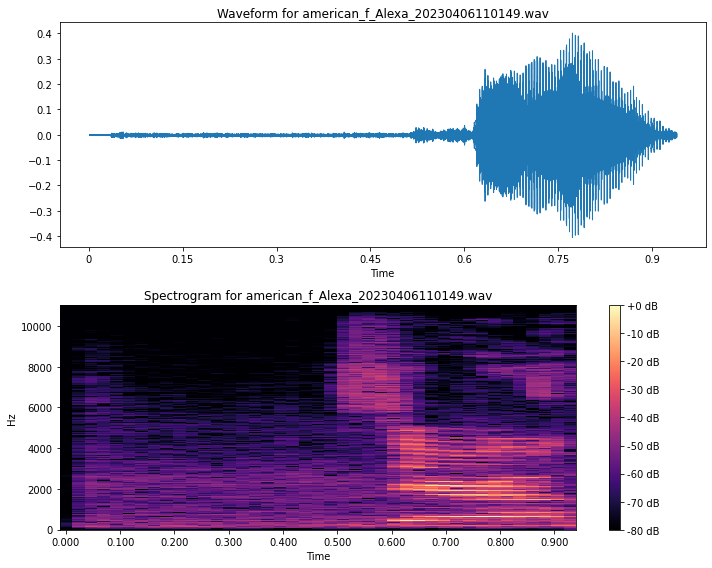

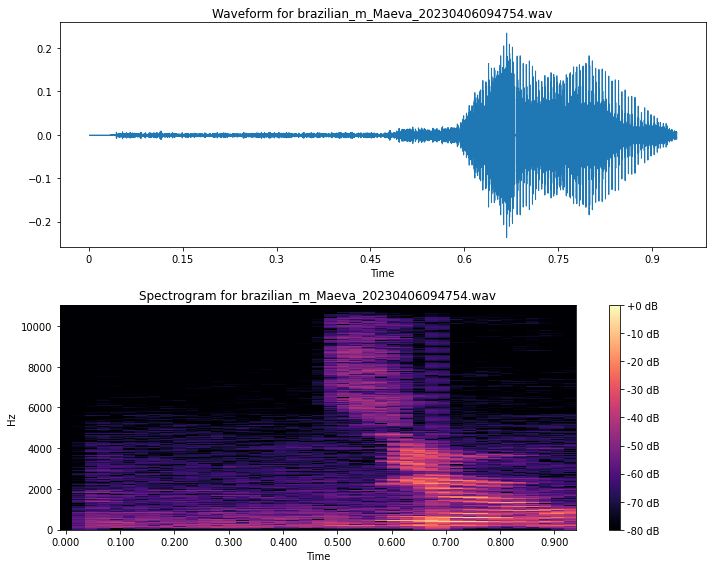

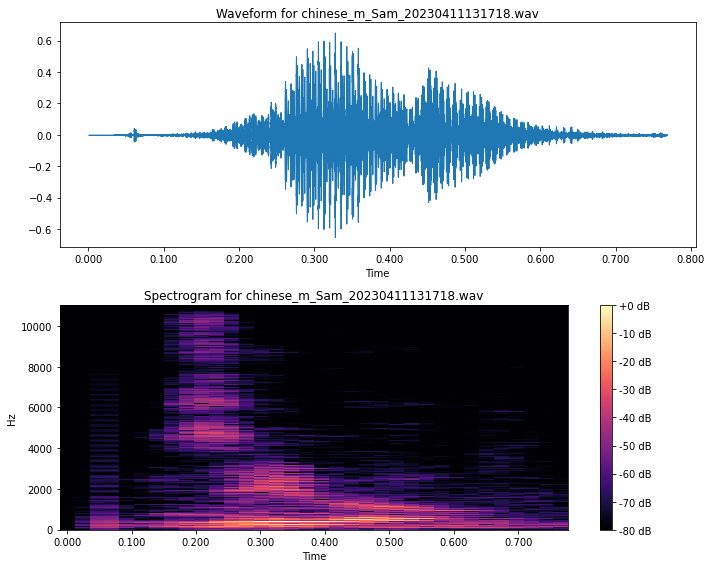

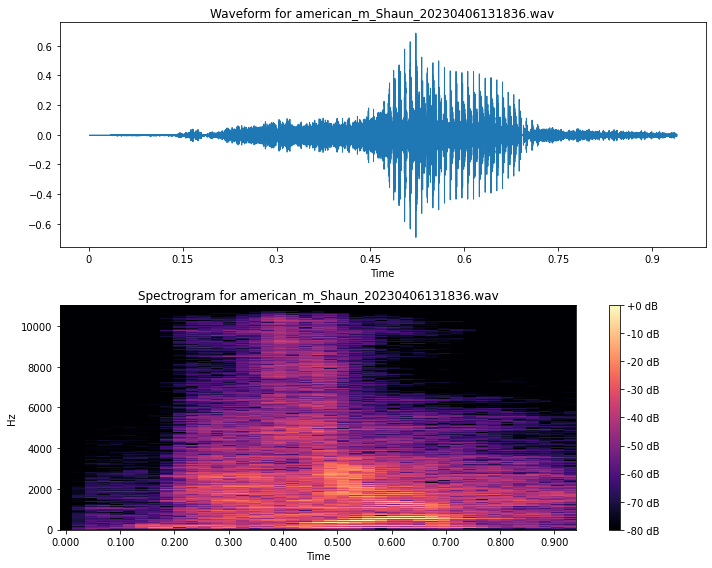

In [22]:
spectrograms = []
waveforms = []
for file in dir_list:
    actual='audio/0/'+file
    y, sr = librosa.load(actual)
    waveforms.append(y)
    spectrogram = librosa.stft(y)
    spectrograms.append(spectrogram)
for i, (waveform, spectrogram) in enumerate(zip(waveforms, spectrograms)):
    plt.figure(figsize=(10, 8))
    
    # plot waveform
    plt.subplot(211)
    librosa.display.waveshow(waveform, sr=sr)
    plt.title(f'Waveform for {dir_list[i]}')
    
    # plot spectrogram
    plt.subplot(212)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(spectrogram), ref=np.max),
                                y_axis='linear', x_axis='time') 
    plt.title(f'Spectrogram for {dir_list[i]}')
    plt.colorbar(format='%+2.0f dB')
    
    plt.tight_layout()
    plt.show()

In [4]:
D=librosa.stft(y)
s_db=librosa.amplitude_to_db(np.abs(D), ref=np.max)
s_db.shape


(1025, 41)

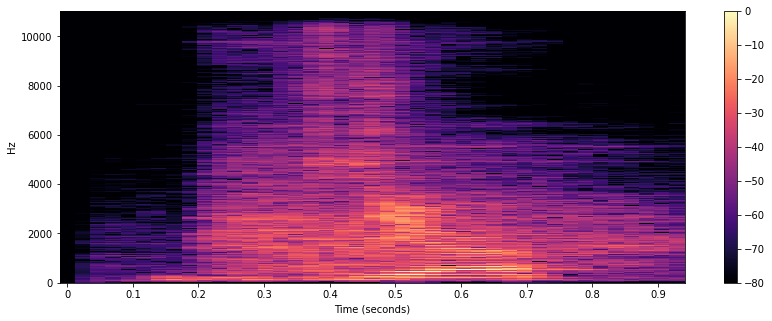

In [24]:
D=librosa.stft(y)
s_db=librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure(figsize=(14,5))
img=librosa.display.specshow(s_db,sr=sr,x_axis='s',y_axis='linear')
plt.colorbar()

(128, 30)
(128, 41)
(128, 41)
(128, 41)
(128, 41)
(128, 30)
(128, 34)
(128, 41)
(128, 41)
(128, 41)
(128, 34)
(128, 41)
(128, 41)
(128, 34)
(128, 30)
(128, 41)
(128, 34)
(128, 41)
(128, 41)
(128, 41)
(128, 34)
(128, 41)


/var/folders/z8/46_440p905v1pzk4x5tn867h0000gn/T/ipykernel_33767/3210519306.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14,5))


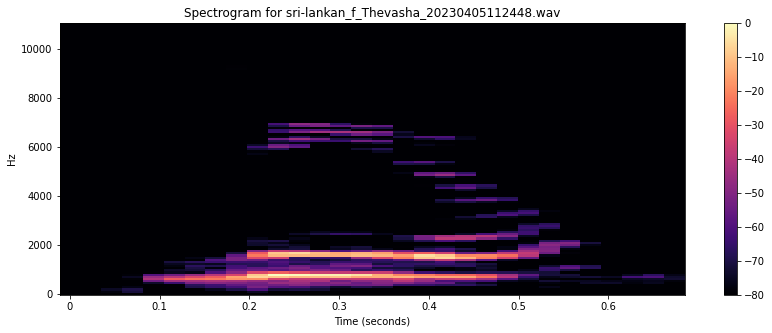

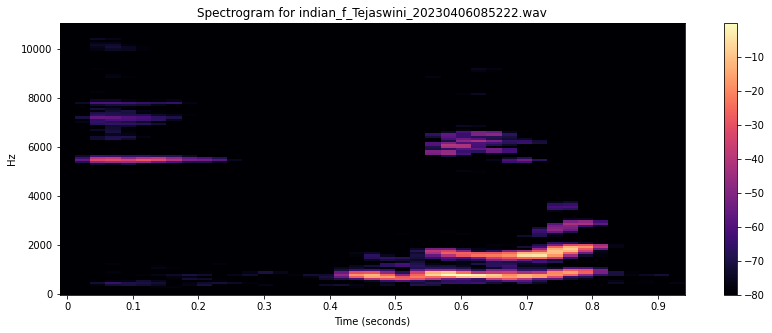

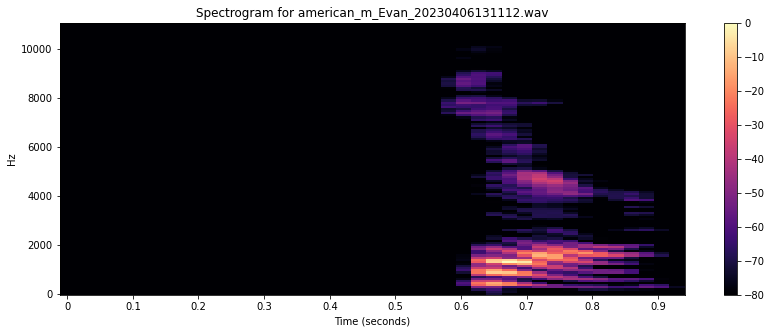

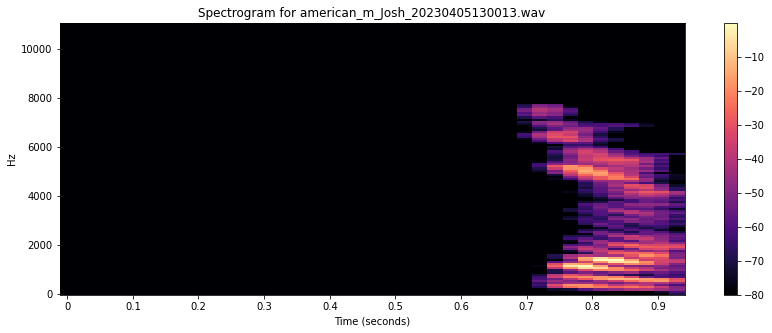

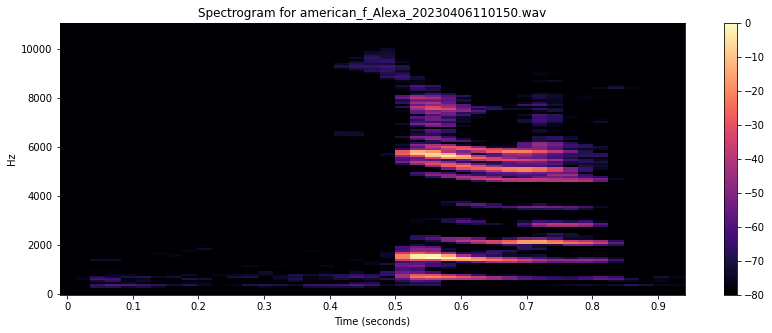

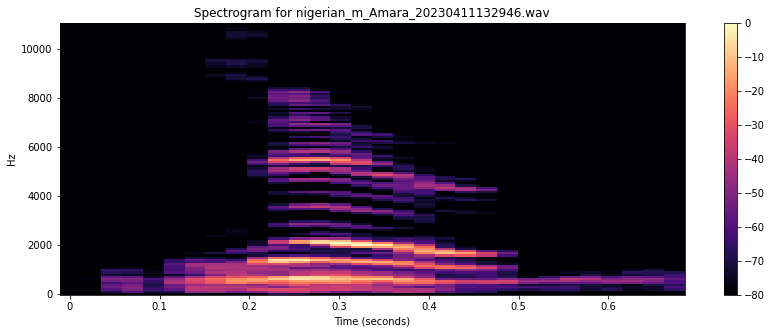

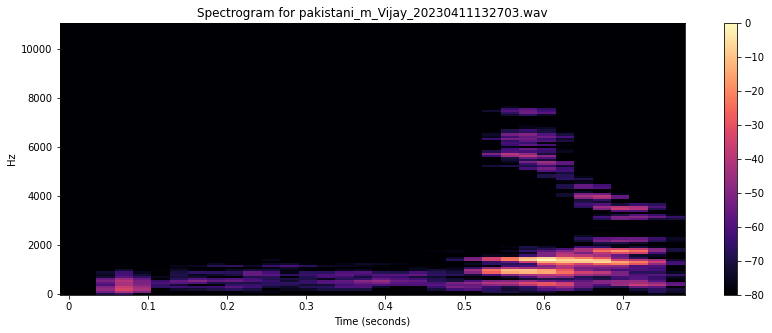

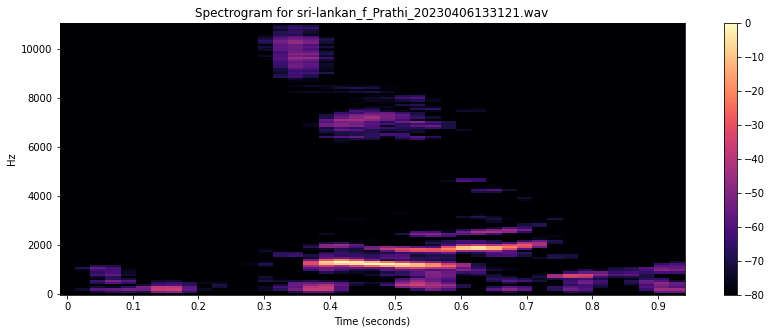

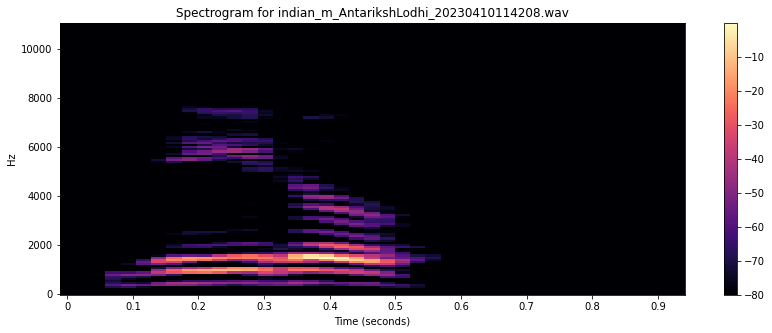

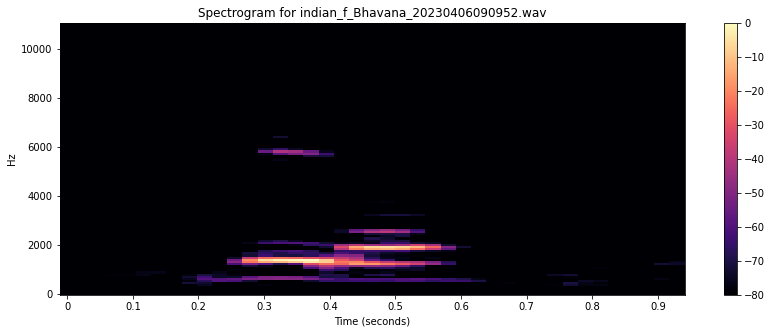

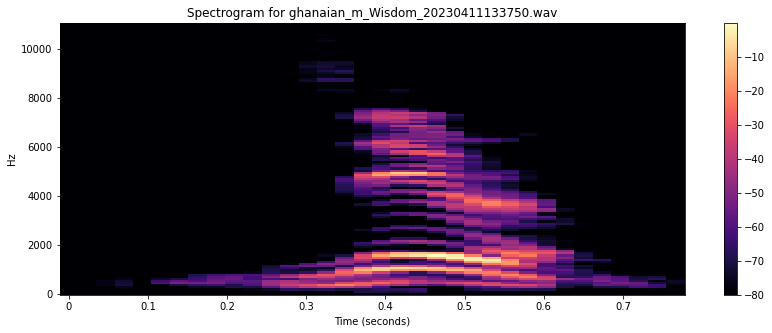

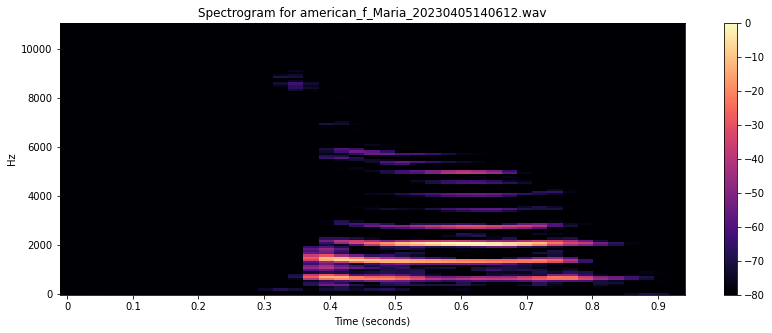

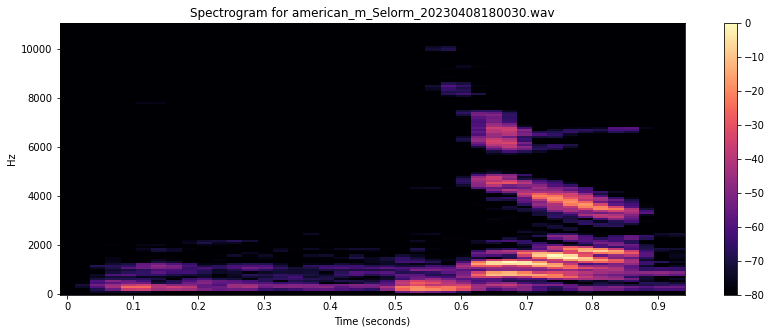

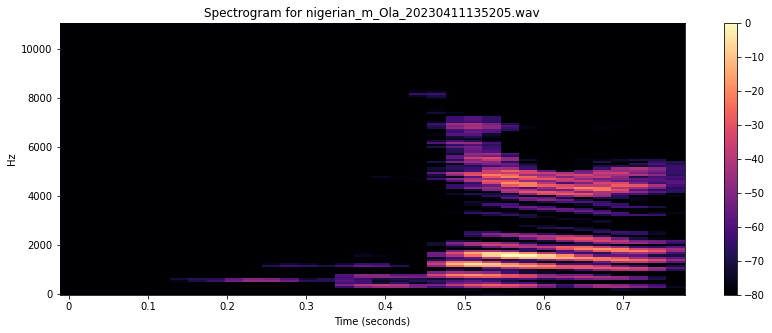

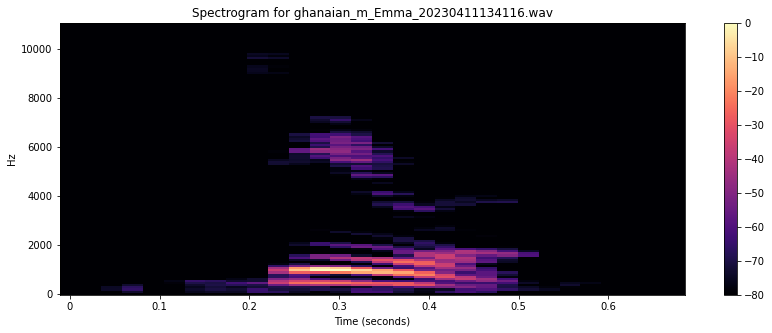

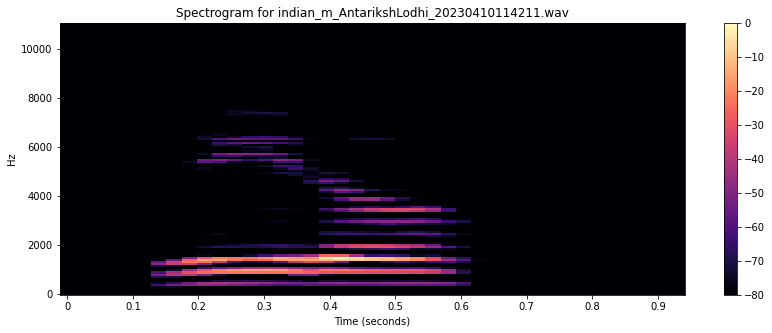

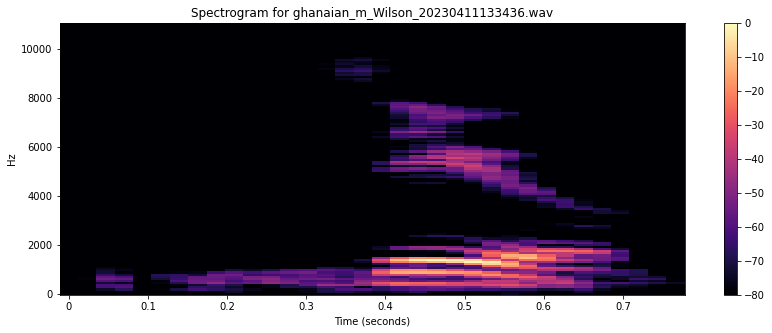

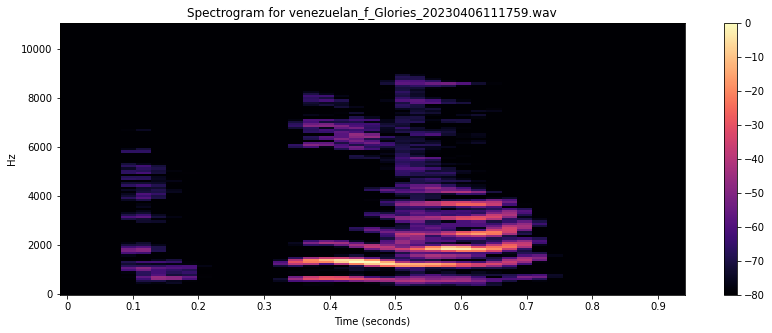

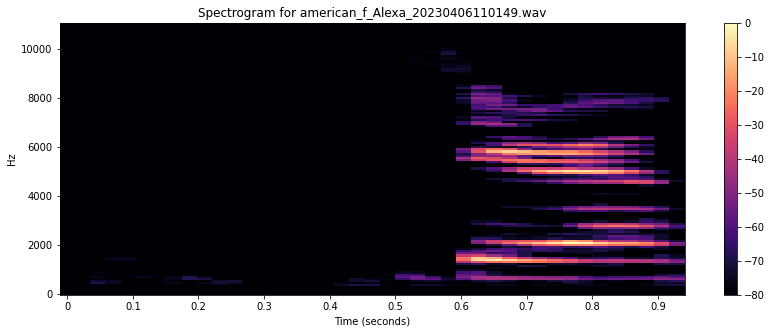

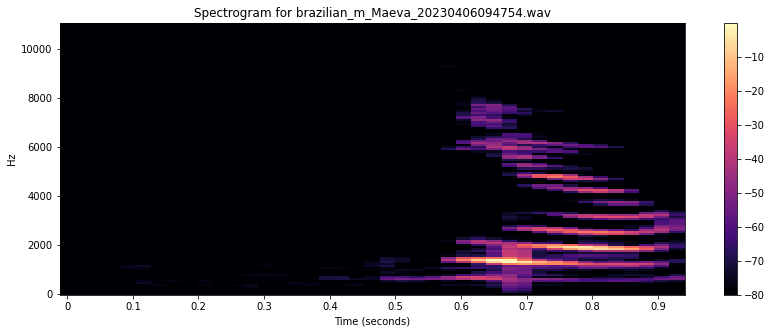

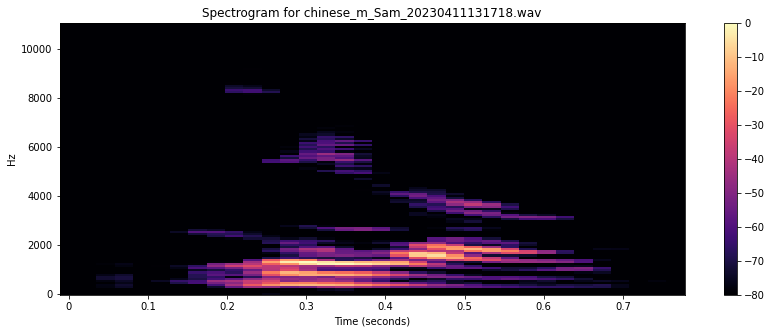

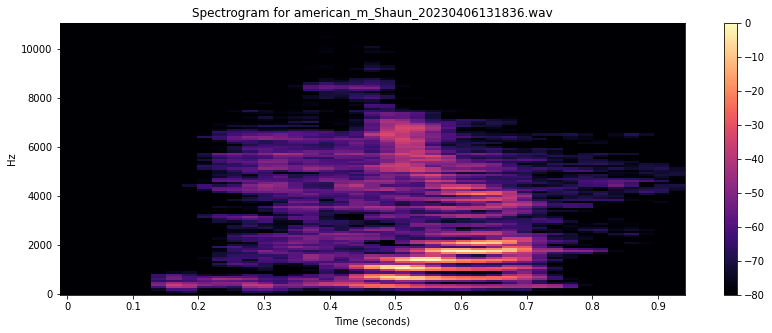

In [23]:
spectrograms = []
waveforms = []
mel_spectrogram=[]
for i,file in enumerate(dir_list):
    actual='audio/0/'+file
    y, sr = librosa.load(actual)
    waveforms.append(y)
    spectrogram = librosa.stft(y)
    spectrograms.append(spectrogram)
    S=librosa.feature.melspectrogram(y=y,sr=sr,n_mels=128,)
    s_db_mel=librosa.amplitude_to_db(S, ref=np.max)
    mel_spectrogram.append(s_db_mel)
    plt.figure(figsize=(14,5))
    img=librosa.display.specshow(s_db_mel,sr=sr,x_axis='s',y_axis='linear')
    plt.title(f'Spectrogram for {dir_list[i]}')
    plt.colorbar()
    print(s_db_mel.shape)

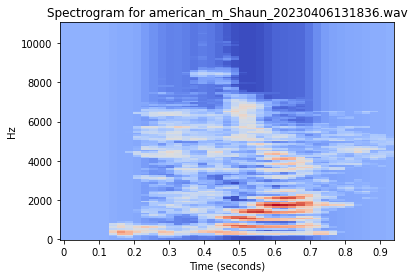

In [113]:
import numpy as np
from sklearn.decomposition import PCA
for i,m_spec in enumerate(mel_spectrogram):
    mel_mean = np.mean(m_spec, axis=0)
    #print(mel_mean)
    centered_mel_spec = m_spec - mel_mean
    librosa.display.specshow(centered_mel_spec,sr=sr,x_axis='s',y_axis='linear')
    plt.title(f'Spectrogram for {dir_list[i]}')
    plt.show
    


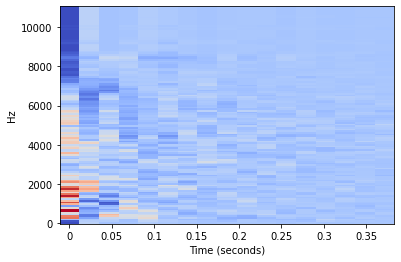

In [116]:
import numpy as np
from sklearn.decomposition import PCA
for i,m_spec in enumerate(mel_spectrogram):
    mel_mean = np.mean(m_spec, axis=0)

    centered_mel_spec = m_spec - mel_mean

    pca = PCA(0.99)
    pca.fit(centered_mel_spec)
    reduced_mel_spec = pca.transform(centered_mel_spec)
    librosa.display.specshow(reduced_mel_spec,sr=sr,x_axis='s',y_axis='linear')


In [ ]:

for i,m_spec in enumerate(mel_spectrogram):
    mask = m_spec.max(axis=0) >-70 #np.min(stats.mode(s_db_mel))
    filtered_arr = m_spec[:, mask]
    img=librosa.display.specshow(filtered_arr,sr=sr,x_axis='s',y_axis='linear')
    plt.title(f'Spectrogram for {dir_list[i]}')
    plt.show()
    print((filtered_arr.shape))


In [25]:
import pickle
with open("data/mel_spectrogram_crop.pickle", "rb") as f:
    data = pickle.load(f)
    for j in range(0,len(data)):
        for i in range(0,len(data[j])): 
            print(data[j][i])

[[-80.      -80.      -80.      ... -80.      -80.      -80.     ]
 [-71.45592 -80.      -80.      ... -80.      -80.      -80.     ]
 [-69.78594 -80.      -80.      ... -80.      -80.      -80.     ]
 ...
 [-80.      -80.      -80.      ... -80.      -80.      -80.     ]
 [-80.      -80.      -80.      ... -80.      -80.      -80.     ]
 [-80.      -80.      -80.      ... -80.      -80.      -80.     ]]
[[-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]
 ...
 [-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]]
[[-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -78.42955  ... -80.       -80.       -80.      ]
 [-80.       -80.       -68.816536 ... -76.172005 -77.51128  -80.      ]
 ...
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.  

In [ ]:
import numpy as np
from matplotlib import pyplot as plt 
len_array=[]
equal=[]
for j in range(0,len(data)):
    for i in range(0,len(data[j])):
        len_array.append(data[j][i].shape[1])
max_len=max(len_array)
for j in range(0,len(data)):
    for i in range(0,len(data[j])):
        padded=(np.pad(data[j][i],((0,0),(0, max_len - (data[j][i].shape[1]))), mode='constant'))
        print(plt.matshow(padded))

In [114]:
padded = np.pad(data[0][4].flatten(), (0, max_len - (data[0][4].flatten().shape[0])), mode='constant')
padded.shape


(5248,)

In [18]:
'''       
        max_len = max(len(audio1), len(audio2), len(audio3))

# Pad the audio signals to make them the same length
audio1_padded = np.pad(audio1, (0, max_len - len(audio1)), mode='constant')
audio2_padded = np.pad(audio2, (0, max_len - len(audio2)), mode='constant')
audio3_padded = np.pad(audio3, (0, max_len - len(audio3)), mode='constant')

data[0][4].flatten().shape

(1408,)

In [11]:

import numpy as np
n=np.array([[1,2,3],
            [4,5,6,]])
n.flatten().shape

(6,)

In [21]:
s_db_mel.shape

(128, 41)

In [16]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
pca.fit(s_db_mel.flatten())
pca_data = pca.transform(s_db_mel.flatten())

per_var = np.round(pca.explained_variance_ratio_* 100,decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x = range(1,len(per_var)+1),height=per_var,tick_label = labels)
plt.ylabel('Percentage')
plt.xlabel('Principal comp')
plt.title('Scree plt')
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[-80. -80. -80. ... -80. -80. -80.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.